The purpose of this notebook is to explore PANCAN TCGA gene expression data.

# Librairies

In [ ]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)
import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *

set_pyplot()

# Path

In [2]:
name = 'pancan'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

In [3]:
database = 'pancan'
cancer = 'pancan'
label_name = "type"
data = TCGA_dataset(data_path, database, cancer, label_name)

# Gene expression unit

The unit of gene expression is probably raw count (*count*) divided by the 75th percentile of each individual sample and multiplied by 1000 (*count_uq*). As the 75th percentile of each individual sample is around 1000, it seems to make sense. 

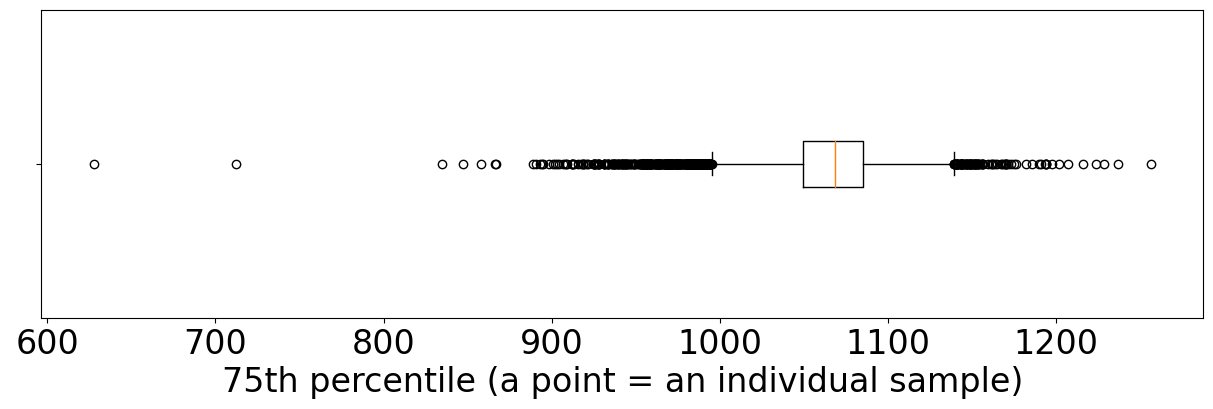

In [4]:
info_X, info_y = get_X_y(data)
info_X = np.array(info_X)
info_y = np.array(info_y)

percentile = np.percentile(info_X, 75, axis=1)
plt.figure(figsize=(15, 4))
plt.boxplot(percentile, vert=False)
plt.yticks(color='w')
plt.xlabel('75th percentile (a point = an individual sample)')
plt.show()

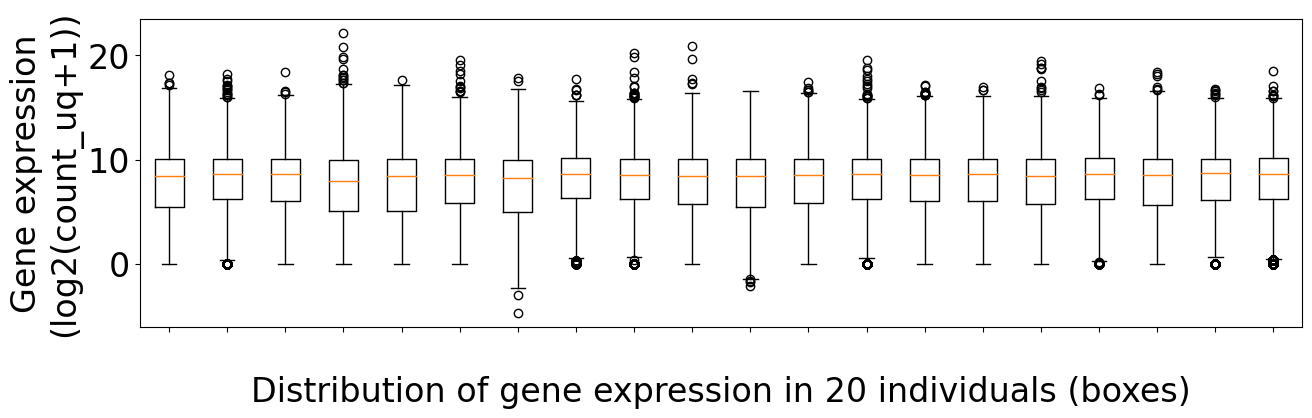

In [5]:
describe_random_individuals(data, log=True, log_scale=False, save_path=None, unit='log2(count_uq+1)')

# Distribution of the values of gene expression

Mean:  1196.15
Median:  363.39
Max:  7092440.5
Min:  -0.98


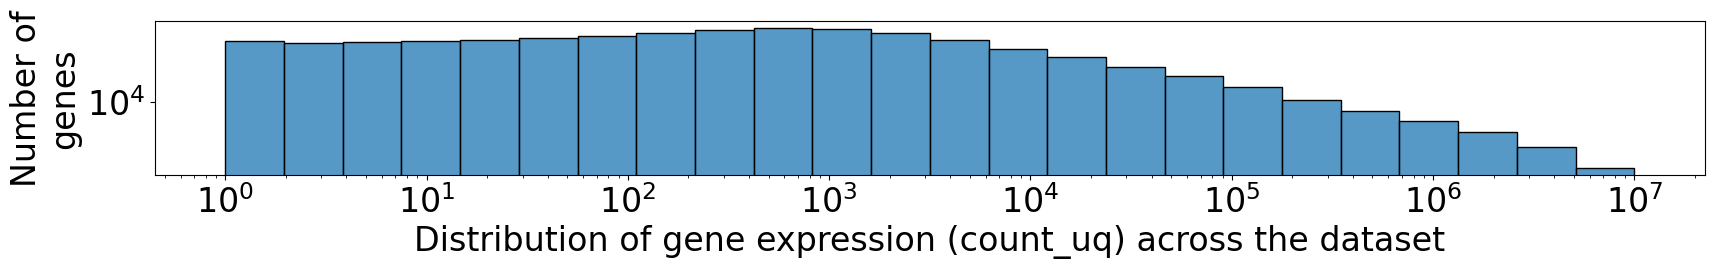

Below, the gene expressions are summed per individual.


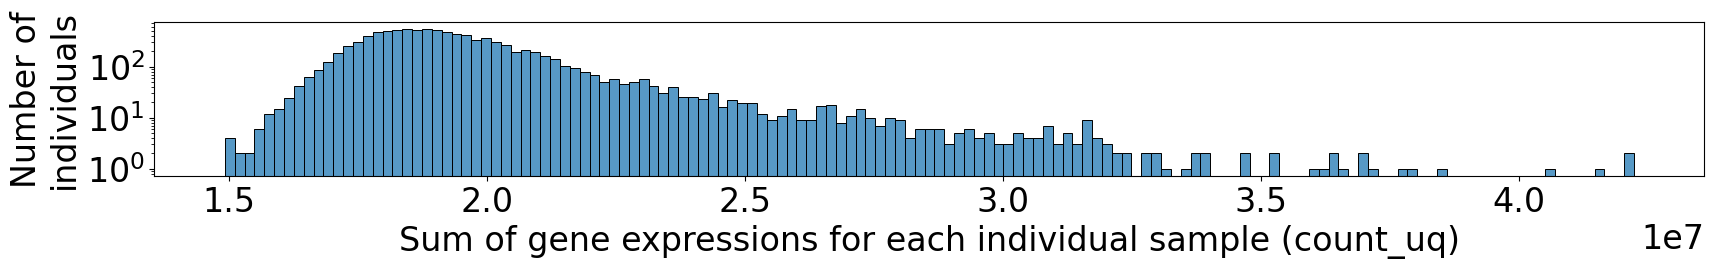

In [6]:
describe_gene_expression(data, unit='count_uq', log=False)

There are 0 genes whose average expression is 0.


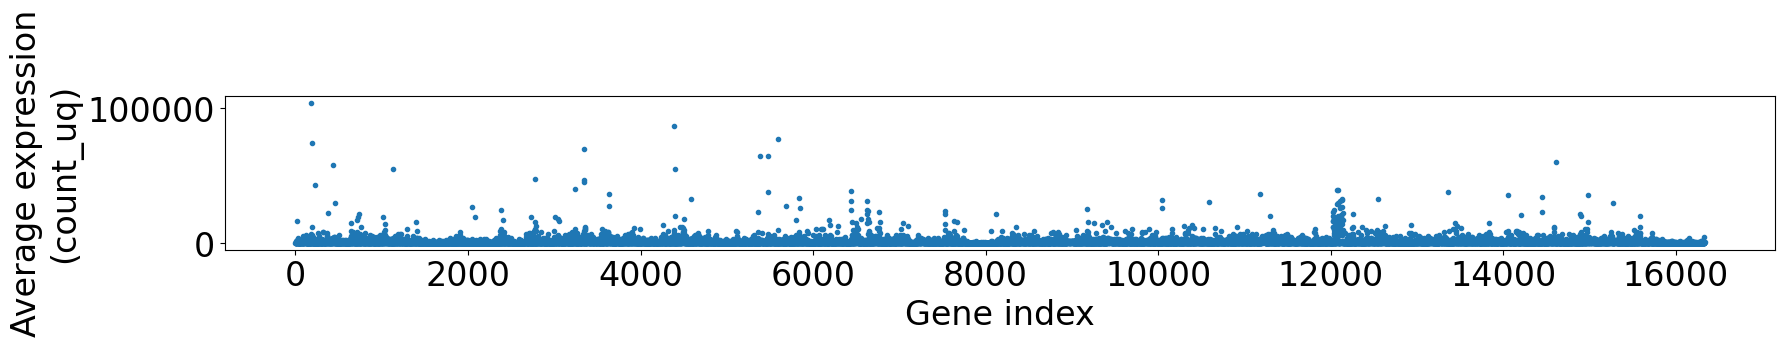

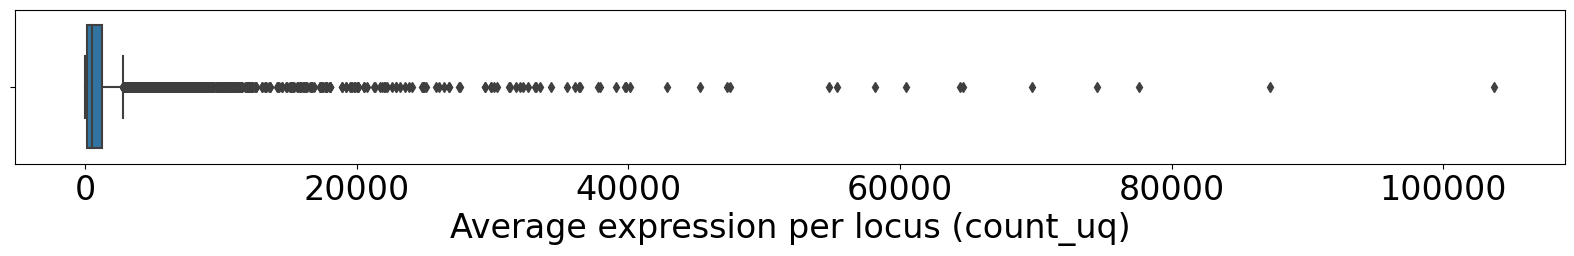

In [7]:
criteria = 'average'  # 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(data, criteria=criteria, log_scale=False, log=False, unit='count_uq')

Some loci have very high average expression. This can be explained in two ways: they are always very active or they are extremely active in some cases. Or both. Let's check with the median.

There are 41 genes whose median expression is 0.


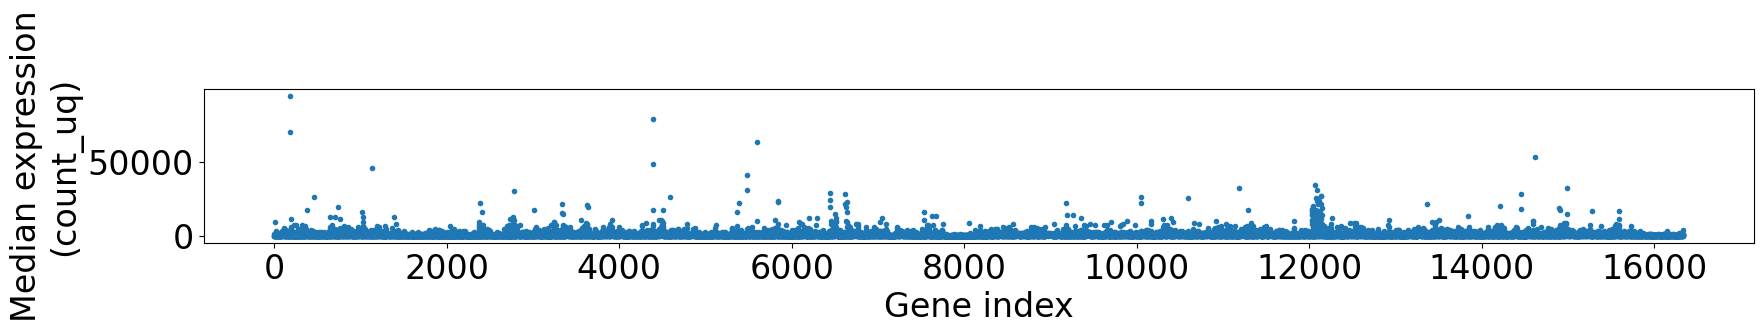

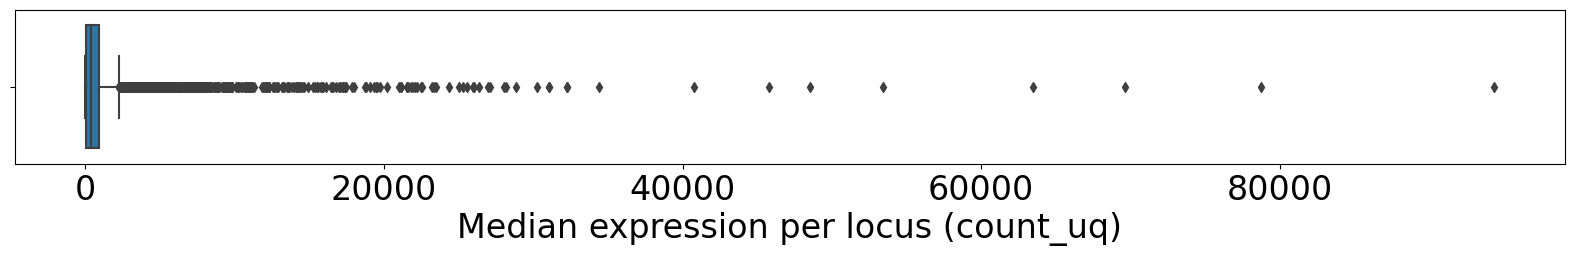

In [8]:
plot_stats_on_gene_expression(data, criteria='median', log_scale=False, log=False, unit='count_uq')

Some genes have very high medians. They often are very active.

There are 0 genes whose maximum is 0.


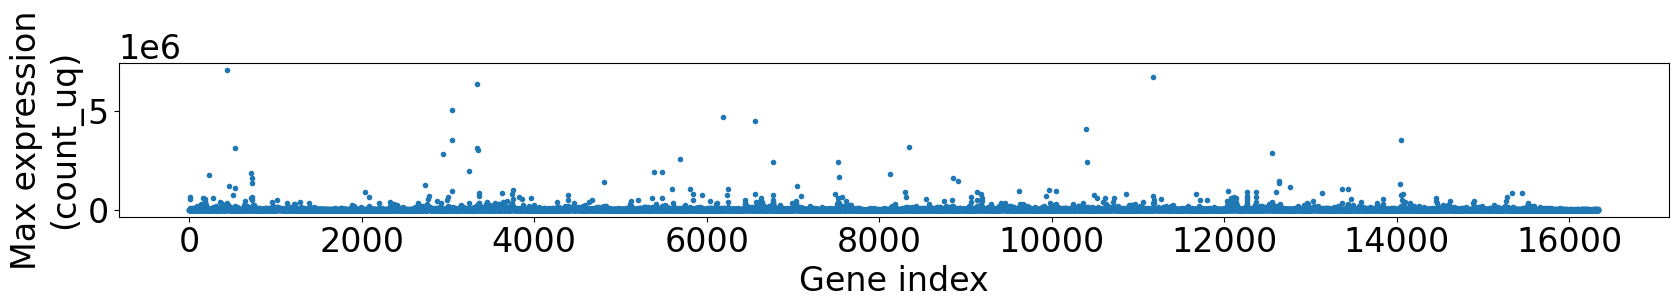

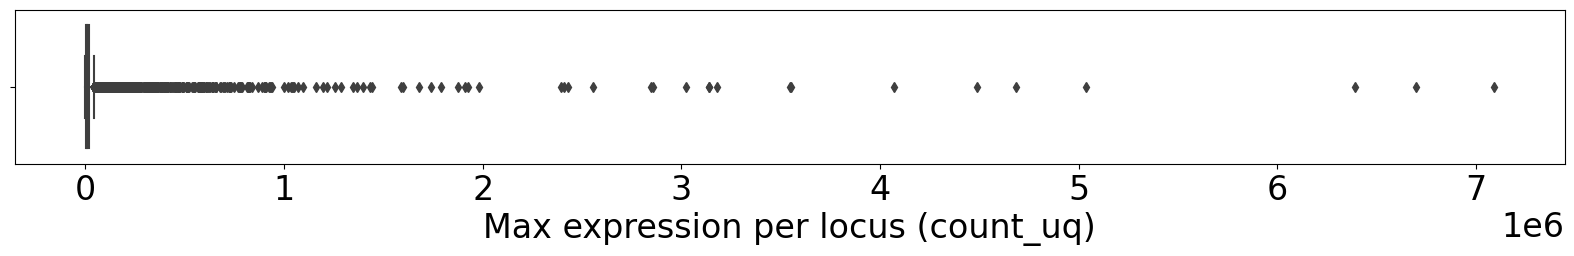

In [9]:
plot_stats_on_gene_expression(data, criteria='max', log_scale=False, log=False, unit='count_uq')

Some genes are always expressed very weakly.

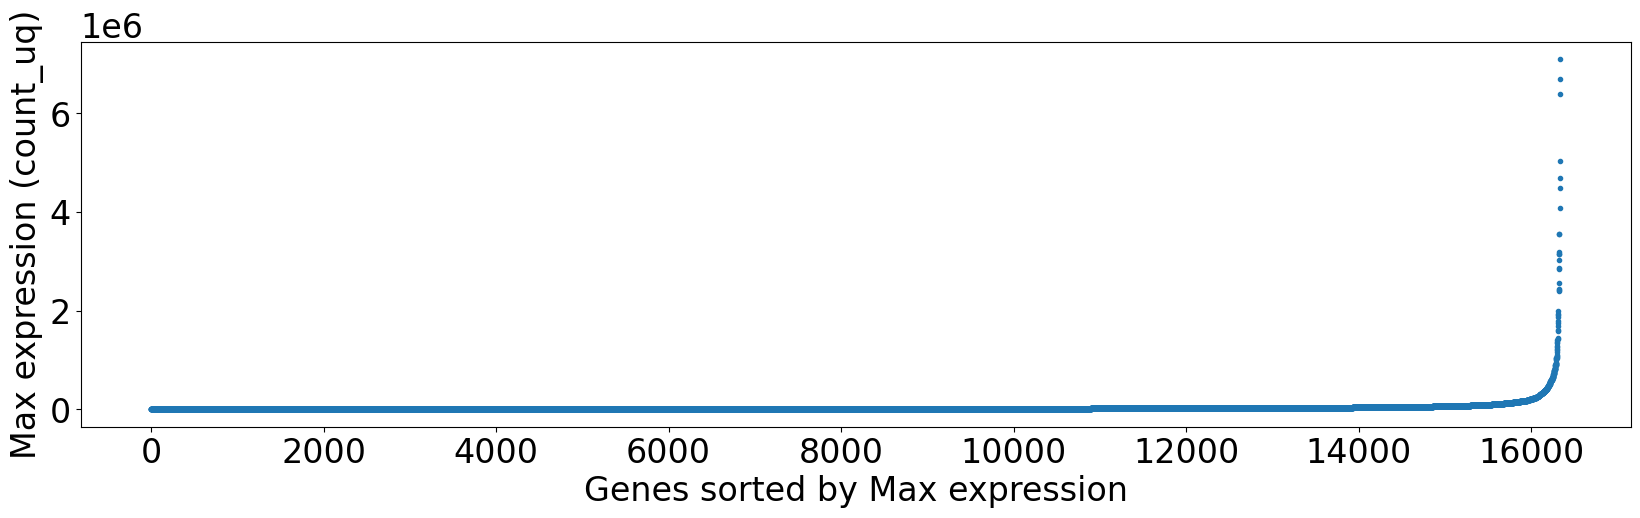

In [10]:
ordered_genes = sort_genes(data, criteria='max', unit='count_uq') # 'average', 'median', 'std', 'min', 'max'

# Analysis by class

In [11]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array([gene.split('|')[0] for gene in data.genes_IDs]) == 'ACPP')

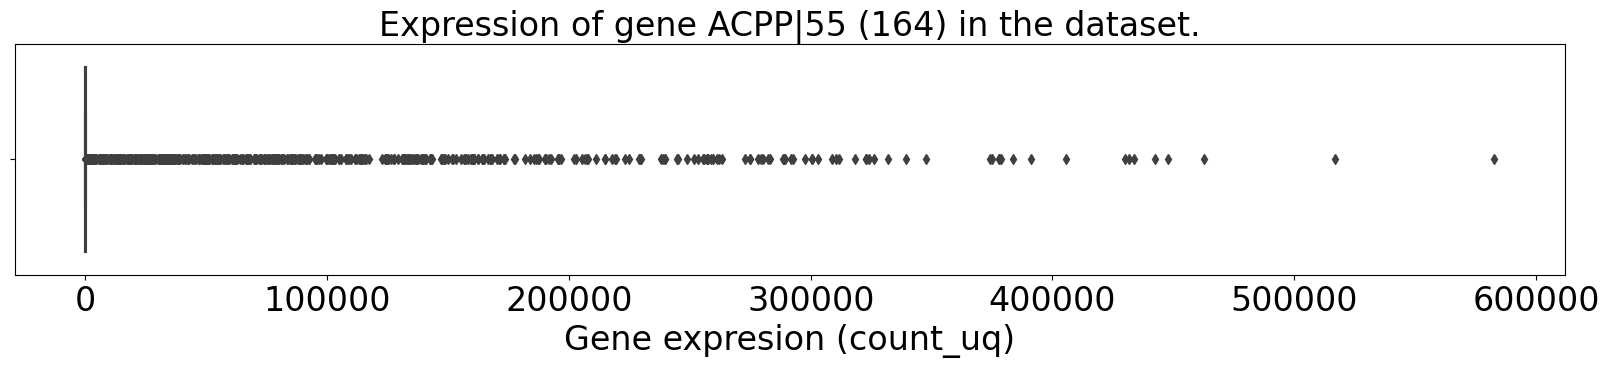

In [12]:
plot_random_gene_expression(data, group_by_classes=False, gene_index=164, log=False, unit='count_uq')

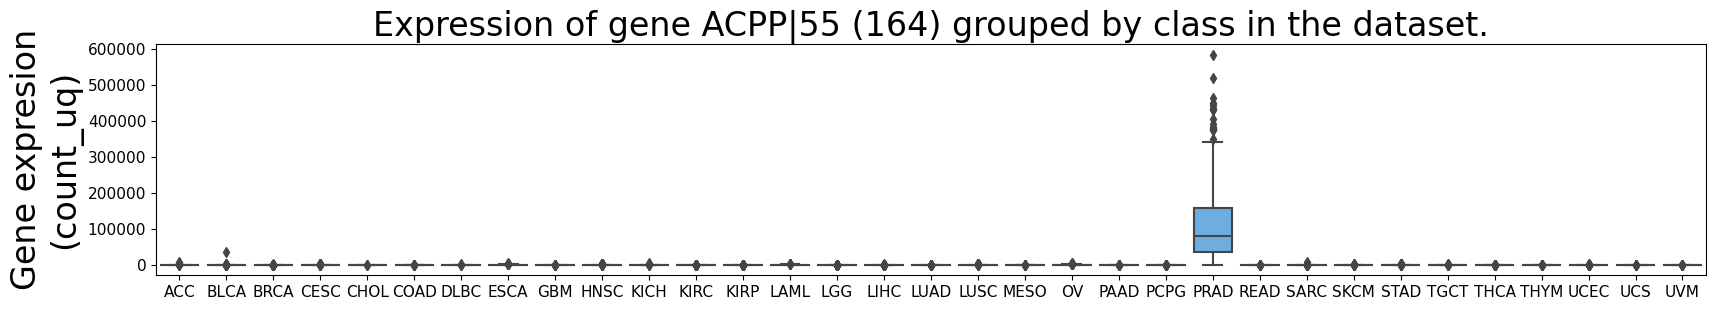

In [13]:
plot_random_gene_expression(data, group_by_classes=True, gene_index=164, log=False, unit='count_uq')

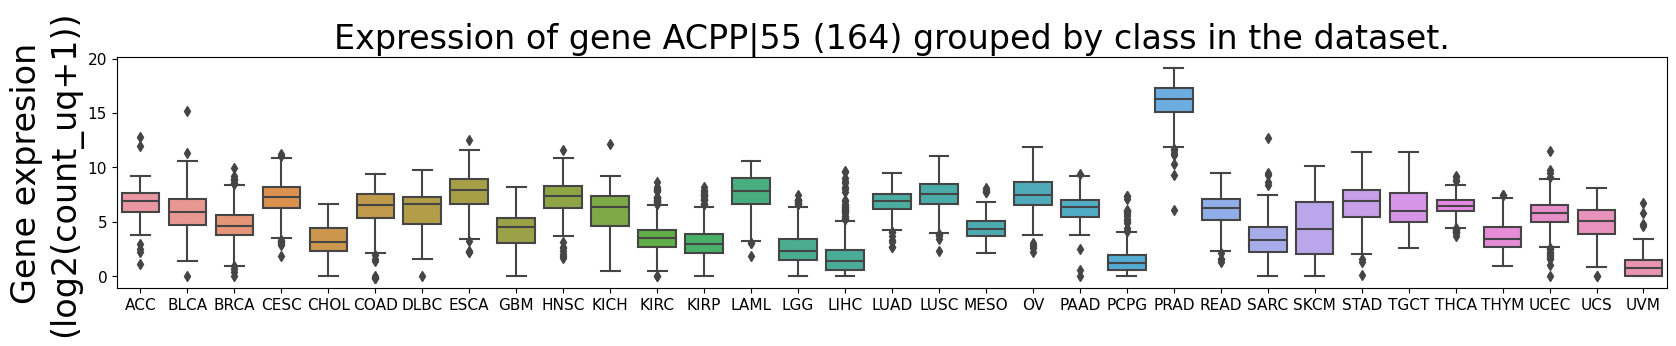

In [14]:
plot_random_gene_expression(data, group_by_classes=True, gene_index=164, log=True, unit='log2(count_uq+1)')

# Analysis by sample

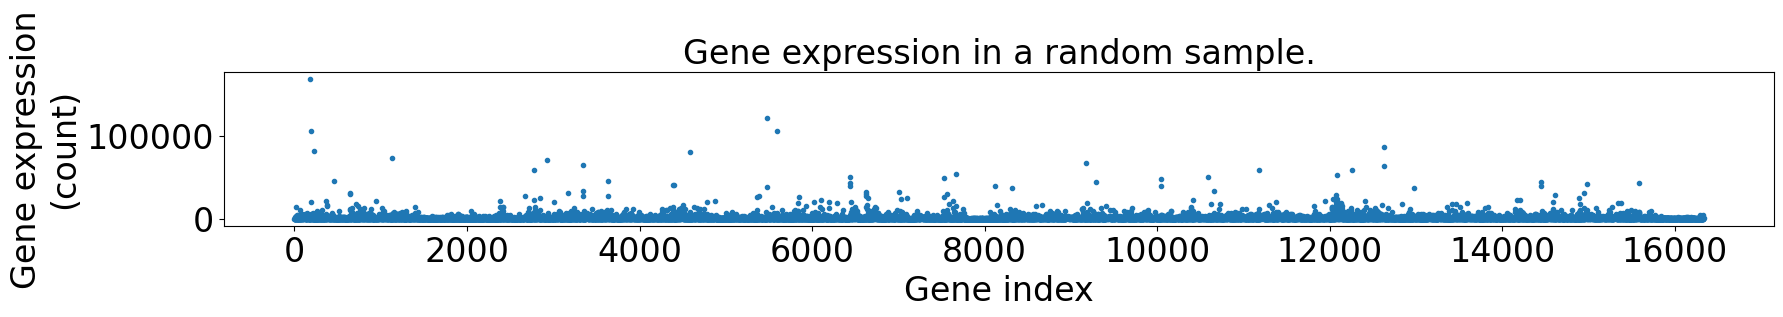

In [15]:
plot_random_sample_expression(data)